# Logistic Regression with Synthetic Data

For more explanation of logistic regression, see
1. [Our course notes](https://jennselby.github.io/MachineLearningCourseNotes/#binomial-logistic-regression)
1. [This scikit-learn explanation](http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)
1. [The full scikit-learn documentation of the LogisticRegression model class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

## Instructions
0. If you haven't already, follow [the setup instructions here](https://jennselby.github.io/MachineLearningCourseNotes/#setting-up-python3) to get all necessary software installed.
0. Read through the code in the following sections:
  * [Data Generation](#Data-Generation)
  * [Visualization](#Visualization)
  * [Model Training](#Model-Training)
  * [Prediction](#Prediction)
0. Complete at least one of the exercise options:
  * [Exercise Option #1 - Standard Difficulty](#Exercise-Option-#1---Standard-Difficulty)
  * [Exercise Option #2 - Advanced Difficulty](#Exercise-Option-#2---Advanced-Difficulty)
  * [Exercise Option #3 - Advanced Difficulty](#Exercise-Option-#3---Advanced-Difficulty)

In [1]:
import numpy.random # for generating our dataset
from sklearn import linear_model # for fitting our model

# force numpy not to use scientific notation, to make it easier to read the numbers the program prints out
numpy.set_printoptions(suppress=True)

# to display graphs in this notebook
%matplotlib inline
import matplotlib.pyplot

## Data Generation

As we did in the [linear regression notebook](https://nbviewer.jupyter.org/github/jennselby/MachineLearningCourseNotes/blob/master/assets/ipynb/LinearRegression.ipynb), we will be generating some fake data.

In this fake dataset, we have two types of plants.
* Plant A tends to be taller (average 60cm) and thinner (average 8cm).
* Plant B tends to be shorter (average 58cm) and wider (average 10cm).
* The heights and diameters of both plants are normally distributed (they follow a bell curve).

* Class 0 will represent Plant A and Class 1 will represent Plant B

In [2]:
NUM_INPUTS = 50 # inputs per class
PLANT_A_AVG_HEIGHT = 60.0
PLANT_A_AVG_WIDTH = 8.0
PLANT_B_AVG_HEIGHT = 58.0
PLANT_B_AVG_WIDTH = 10.0

# Pick numbers randomly with a normal distribution centered around the averages

plant_a_heights = numpy.random.normal(loc=PLANT_A_AVG_HEIGHT, size=NUM_INPUTS)
plant_a_widths = numpy.random.normal(loc=PLANT_A_AVG_WIDTH, size=NUM_INPUTS)

plant_b_heights = numpy.random.normal(loc=PLANT_B_AVG_HEIGHT, size=NUM_INPUTS)
plant_b_widths = numpy.random.normal(loc=PLANT_B_AVG_WIDTH, size=NUM_INPUTS)

# this creates a 2-dimensional matrix, with heights in the first column and widths in the second
# the first half of rows are all plants of type a and the second half are type b
plant_inputs = list(zip(numpy.append(plant_a_heights, plant_b_heights),
                        numpy.append(plant_a_widths, plant_b_widths)))

# this is a list where the first half are 0s (representing plants of type a) and the second half are 1s (type b)
classes = [0]*NUM_INPUTS + [1]*NUM_INPUTS

## Visualization

Let's visualize our dataset, so that we can better understand what it looks like.

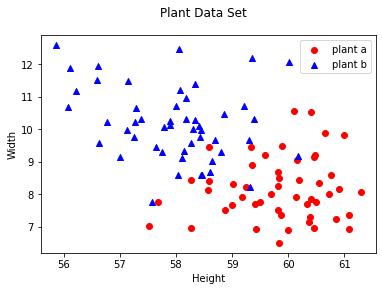

In [3]:
# create a figure and label it
fig = matplotlib.pyplot.figure()
fig.suptitle('Plant Data Set')
matplotlib.pyplot.xlabel('Height')
matplotlib.pyplot.ylabel('Width')

# put the generated points on the graph
a_scatter = matplotlib.pyplot.scatter(plant_a_heights, plant_a_widths, c="red", marker="o", label='plant a')
b_scatter = matplotlib.pyplot.scatter(plant_b_heights, plant_b_widths, c="blue", marker="^", label='plant b')

# add a legend to explain which points are which
matplotlib.pyplot.legend(handles=[a_scatter, b_scatter])

# show the graph
matplotlib.pyplot.show()

## Model Training

Next, we want to fit our logistic regression model to our dataset.

In [4]:
model = linear_model.LogisticRegression()
model.fit(plant_inputs, classes)

print('Intercept: {0}  Coefficients: {1}'.format(model.intercept_, model.coef_))

Intercept: [94.26533723]  Coefficients: [[-1.84352274  1.58797636]]


## Prediction

Now we can make some predictions using the trained model. Note that we are generating the new data exactly the same way that we generated the training data above.

In [5]:
# Generate some new random values for two plants, one of each class
new_a_height = numpy.random.normal(loc=PLANT_A_AVG_HEIGHT)
new_a_width = numpy.random.normal(loc=PLANT_A_AVG_WIDTH)
new_b_height = numpy.random.normal(loc=PLANT_B_AVG_HEIGHT)
new_b_width = numpy.random.normal(loc=PLANT_B_AVG_WIDTH)

# Pull the values into a matrix, because that is what the predict function wants
inputs = [[new_a_height, new_a_width], [new_b_height, new_b_width]]

# Print out the outputs for these new inputs
print('Plant A: {0} {1}'.format(new_a_height, new_a_width))
print('Plant B: {0} {1}'.format(new_b_height, new_b_width))
print('Class predictions: {0}'.format(model.predict(inputs))) # guess which class
print('Probabilities:\n{0}'.format(model.predict_proba(inputs))) # give probability of each class

Plant A: 60.26684699032277 7.925289281761661
Plant B: 59.309264857798375 8.836925575310714
Class predictions: [0 0]
Probabilities:
[[0.98597506 0.01402494]
 [0.73881379 0.26118621]]


# Exercise Option #1 - Standard Difficulty

Answer the following questions. You can also use the graph below, if seeing the data visually helps you understand the data.
1. What should we be expecting as the output for class predictions in the above cell? If the model is not giving the expected output, what are some of the reasons it might not be?
1. How do the probabilities output by the above cell relate to the class predictions? Why do you think the model might be more or less confident in its predictions?
1. If you change the averages in the data generation code (like PLANT_A_AVG_HEIGHT) and re-run the code, how do the predictions change, and why?
1. Looking at the intercept and coefficient output further above, if a coefficient is negative, what has the model learned about this feature? In other words, if you took a datapoint and you increased the value of a feature that has a negative coefficient, what would you expect to happen to the probabilities the model gives this datapoint?

## Answers for Option \#1

**1.**  
The class predictions above are accurate; Plant A should be of Class 0 and Plant B should be of Class 1 because the test values (Plants A and B) were generated randomly using the same averages and Gaussian distribution that the data set was generated with. Because the test values are selected from a Gaussian distribution, it is unlikely that they will be far from the class averages and therefore should be easily identifiable as one class or the other. But if, for example, test case Plant A has height = 58.5 and width = 9 (unlikely), then the probabilites would show that Plant A would more likely be of Class 1 even though it was just a statistical fluke. Additionally (not in this case), it is possible that there could be more overlap between the two classes, which would make it hard for the model to give an accurate class prediction. However, in this case the probabilities would still be fairly accurate, but they would be much more ambigous (eg. ~40% vs ~60%).

**2.**  
I would assume that the class predictions would be chosen based on which probability is greater, so if it was 51% likely to be Class 0 and 49% likely to be Class 1, the class prediction would be 0. If the probabilities were tied by some miracle, I don't know what would happen (random choice, whichever class has a lower number, DNE?). There could also be a threshold value set up: for example, if we were trying to decide whether a tree was an oak or not, we could say that if the probability (that the tree is an oak) is greater than 75% than the tree is indeed an oak, but otherwise it's not. In this case, the model is quite confident of the class predictions becuase the probabilities are so strongly weighted (when I wrote this it was 0: 0.00302983, 1: 0.99697017). If the probabilities were more like (0: 0.4, 1: 0.6), the model would be less confident of the class predictions but I belive would still choose the same prediction.

**3.**  
Nothing fundamental will change, the numbers would shift a little but if the predictions/data are still based on the normal distribution curve and averages then the probabilites should still be heavily weighted and the predictions correct and confident. If you changned the averages of Class 0 and 1 to be closer together, then it would be harder to get a strong probability direction because there would be more overlap, and the confidence would decrease some.

**4.**  
Binomial logistic regression can be represented by the equation y = e^x / 1+e^x, where x = inputs\*parameters = a\*x1 + b\*x2 + intercept. So as x goes to infinity y goes to 1, and as x goes to 0 so does the fraction. However, if we make a coefficient negative (a or b), it turns x negative too (or makes x smaller—which will have the same effect of decreasing the probability), which means that the equation becomes 1 / 1+e^x, which will get closer and closer to 0 as x goes to negative infinity. So, if you increase the magnitude of a negative coefficient, the probability is going to get smaller.

# Exercise Option #3 - Advanced Difficulty

If you have more than two classes, you can use multinomial logistic regression or the one vs. rest technique, where you use a binomial logistic regression for each class that you have and decide if it is or is not in that class. Try expanding the program with a third type and implementing your own one vs. rest models. To test if this is working, compare your output to running your expanded dataset through scikit-learn, which will automatically do one vs. rest if there are more than two classes.

In [6]:
# add a third type


PLANT_C_AVG_HEIGHT = 62.0
PLANT_C_AVG_WIDTH = 12.0

# Pick numbers randomly with a normal distribution centered around the averages

plant_c_heights = numpy.random.normal(loc=PLANT_C_AVG_HEIGHT, size=NUM_INPUTS)
plant_c_widths = numpy.random.normal(loc=PLANT_C_AVG_WIDTH, size=NUM_INPUTS)

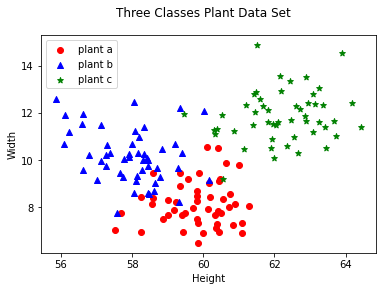

In [7]:
# vizualization


# create a figure and label it
fig = matplotlib.pyplot.figure()
fig.suptitle('Three Classes Plant Data Set')
matplotlib.pyplot.xlabel('Height')
matplotlib.pyplot.ylabel('Width')

# put the generated points on the graph
a_scatter = matplotlib.pyplot.scatter(plant_a_heights, plant_a_widths, c="red", marker="o", label='plant a')
b_scatter = matplotlib.pyplot.scatter(plant_b_heights, plant_b_widths, c="blue", marker="^", label='plant b')
c_scatter = matplotlib.pyplot.scatter(plant_c_heights, plant_c_widths, c="green", marker="*", label='plant c')

# add a legend to explain which points are which
matplotlib.pyplot.legend(handles=[a_scatter, b_scatter, c_scatter])

# show the graph
matplotlib.pyplot.show()

## Create three different models

To implement my own one vs. rest technique, I created three seperate binomial models. The first model would determine whether the test case fit into class a/0 by combining classes b/1 and c/2 into one class. The second model would use the same method (combining classes 0 and 2 into one class) to determine if the test case fit into class 1. The third would combine classes 1 and 2.

To train each model, I created a unique classes list (solutions) for each. So for model a, my classes list comprised of 50 0s, then 100 1s. A 0 meant that plant was in class 0 and a 1 meant that plant was in class 1 or 2.

**IMPORTANT:** In my code or documentation, "class 0" is the same as "class a", "class 1" is the same as "class b", and "class 2" is the same as "class c".

In [8]:
# create 3 models


# this creates a 2-dimensional matrix, with heights in the first column and widths in the second
# the first third of rows are all plants of type a, the second third are type b, and the last third are type c
plant_inputs_3 = list(zip(numpy.append(plant_a_heights, numpy.append(plant_b_heights, plant_c_heights)),
                        numpy.append(plant_a_widths, numpy.append(plant_b_widths, plant_c_widths))))

classes_all = [0]*NUM_INPUTS + [1]*NUM_INPUTS + [2]*NUM_INPUTS # for using sklearn ovr later

# class 0 is the class which is being tested to see if the test plant is part of that class, class 1 is everything else

# for testing if the plant is part of class a/0
classes_a = [0]*NUM_INPUTS + [1]*NUM_INPUTS + [1]*NUM_INPUTS
model_a = linear_model.LogisticRegression()
model_a.fit(plant_inputs_3, classes_a)

# class b/1
classes_b = [1]*NUM_INPUTS + [0]*NUM_INPUTS + [1]*NUM_INPUTS
model_b = linear_model.LogisticRegression()
model_b.fit(plant_inputs_3, classes_b)

# class c/2
classes_c = [1]*NUM_INPUTS + [1]*NUM_INPUTS + [0]*NUM_INPUTS
model_c = linear_model.LogisticRegression()
model_c.fit(plant_inputs_3, classes_c)

LogisticRegression()

In [9]:
# create test values


# Generate a single new plant for each class
test_a_height = numpy.random.normal(loc=PLANT_A_AVG_HEIGHT)
test_a_width = numpy.random.normal(loc=PLANT_A_AVG_WIDTH)
test_b_height = numpy.random.normal(loc=PLANT_B_AVG_HEIGHT)
test_b_width = numpy.random.normal(loc=PLANT_B_AVG_WIDTH)
test_c_height = numpy.random.normal(loc=PLANT_C_AVG_HEIGHT)
test_c_width = numpy.random.normal(loc=PLANT_C_AVG_WIDTH)

# Print out the test values
print('Test Plant A: {0} {1}'.format(test_a_height, test_a_width))
print('Test Plant B: {0} {1}'.format(test_b_height, test_b_width))
print('Test Plant C: {0} {1}'.format(test_c_height, test_c_width))

# Pull the values into a matrix, because that is what the predict function wants
inputs = [[[test_a_height, test_a_width]], [[test_b_height, test_b_width]], [[test_c_height, test_c_width]]]
print_statements = ["Test Plant A:", "\nTest Plant B:", "\nTest Plant C:"] # this is for use in the for loop (next code cell)

Test Plant A: 60.75388211426814 6.565634274581181
Test Plant B: 60.8385756071894 10.014919975101723
Test Plant C: 61.57341428988897 11.445648063611653


## Predictions

Here I go through each test case (a, b, and c) using a for loop. Inside that loop I run each model over the current test case to get predictions and probabilities. If a prediction is 0, it means that the model believes that the test case is of the class linked to the model. This is because when I trained the models, I used 0 to represent one of the three classes and 1 to represent the other two. Therefore, the prediction will be 0 if the test case is of that model's class. ```model_a``` is linked to class a (or 0), ```model_b``` is linked to class b (or 1), and ```model_c``` is linked to class c (or 2).

Sometimes the models will output two classes as correct. This is because I'm testing each case individually whether it fits into one class of not, so theoretically the test case could fit into overlap between two classes and be predicted as both seperately. To fix this, I additionally compare the percentages that the test case is part of class 0 (the class linked to the model) and output the class which has the largest percentage.

At the end, I also use a built-in sklearn ovr model to double check my results (even though I can already figure out if they're correct or not).

In [18]:
# predictions


for j in range(len(inputs)): # go through each test case
    
    i = inputs[j]
    p = print_statements[j]
    
    # get predictions from each model
    pred_a = model_a.predict(i)
    pred_b = model_b.predict(i)
    pred_c = model_c.predict(i)
    
    # get probabilities from each model
    prob_a = model_a.predict_proba(i)
    prob_b = model_b.predict_proba(i)
    prob_c = model_c.predict_proba(i)
    
    print(p)
    print("Class predictions (0 is true and 1 is false): a:{0} b:{1} c:{2}".format(pred_a, pred_b, pred_c))
    print("Probabilities: a:{0} b:{1} c:{2}".format(prob_a, prob_b, prob_c))
    
    # to account if two models think the test case is part of two seperate classes
    
    prob_a_true = float(str(prob_a[0][0]).split()[0]) # get the probability that the test case is of class a
    prob_b_true = float(str(prob_b[0][0]).split()[0]) # class b
    prob_c_true = float(str(prob_c[0][0]).split()[0]) # class c
    
    if prob_a_true > prob_b_true and prob_a_true > prob_c_true: # if prob of a is biggest
        print("Based on all three probabilities this test is of class a")
        
    elif prob_b_true > prob_c_true and prob_b_true > prob_a_true: # if prob of b is biggest
        print("Based on all three probabilities this test is of class b")
        
    elif prob_c_true > prob_a_true and prob_c_true > prob_b_true: # if prob of c is biggest
        print("Based on all three probabilities this test is of class c")
        
    # for final project
    mimic_probs = [prob_a_true, prob_b_true, prob_c_true]
    print("\nOutput matching sklearn ovr output:\nProbabilities for class [a b c]:", mimic_probs)

Test Plant A:
Class predictions (0 is true and 1 is false): a:[0] b:[1] c:[1]
Probabilities: a:[[0.99751184 0.00248816]] b:[[0.00107213 0.99892787]] c:[[0.00498843 0.99501157]]
Based on all three probabilities this test is of class a

Output matching sklearn ovr output:
Probabilities for class [a b c]: [0.9975118433261321, 0.0010721321032215458, 0.004988433786286994]

Test Plant B:
Class predictions (0 is true and 1 is false): a:[1] b:[1] c:[1]
Probabilities: a:[[0.24552688 0.75447312]] b:[[0.02275289 0.97724711]] c:[[0.41921634 0.58078366]]
Based on all three probabilities this test is of class c

Output matching sklearn ovr output:
Probabilities for class [a b c]: [0.24552687794232952, 0.022752891359391736, 0.41921634005299435]

Test Plant C:
Class predictions (0 is true and 1 is false): a:[1] b:[1] c:[0]
Probabilities: a:[[0.02577412 0.97422588]] b:[[0.01673073 0.98326927]] c:[[0.95700886 0.04299114]]
Based on all three probabilities this test is of class c

Output matching sklearn 

In [11]:
# double check using sklearn ovr (even though my code works correctly)


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

clf = LogisticRegression(random_state=0, multi_class='ovr')
model_ovr = clf.fit(plant_inputs_3, classes_all)

for j in range(len(inputs)): # go through each test case
    
    i = inputs[j]
    p = print_statements[j]
    
    # get prediction
    pred = model_ovr.predict(i)
    
    # get probability
    prob = model_ovr.predict_proba(i)
    
    print(p)
    print("Class prediction: {0}".format(pred))
    print("Probabilities for class [a b c]: {0}".format(prob))

Test Plant A:
Class prediction: [0]
Probabilities for class [a b c]: [[0.99396101 0.00106832 0.00497068]]

Test Plant B:
Class prediction: [2]
Probabilities for class [a b c]: [[0.35713203 0.0330953  0.60977267]]

Test Plant C:
Class prediction: [2]
Probabilities for class [a b c]: [[0.02578666 0.01673887 0.95747447]]


## Model Validation

In [12]:
# create test values
# I create 1000 test values for each class to ensure robust metrics


values = []
classes_true = []

for i in range(1000): # test values of class a
    h = numpy.random.normal(loc=PLANT_A_AVG_HEIGHT)
    w = numpy.random.normal(loc=PLANT_A_AVG_WIDTH)
    values.append([[h, w]])
    classes_true.append(0)
    
for i in range(1000): # class b
    h = numpy.random.normal(loc=PLANT_B_AVG_HEIGHT)
    w = numpy.random.normal(loc=PLANT_B_AVG_WIDTH)
    values.append([[h, w]])
    classes_true.append(1)
    
for i in range(1000): # class c
    h = numpy.random.normal(loc=PLANT_C_AVG_HEIGHT)
    w = numpy.random.normal(loc=PLANT_C_AVG_WIDTH)
    values.append([[h, w]])
    classes_true.append(2)

In [13]:
# predict each test value and create a list of class predictions


classes_pred = []
classes_prob = []
    
for t in values:

    # get predictions from each model
    pred_a = model_a.predict(t)
    pred_b = model_b.predict(t)
    pred_c = model_c.predict(t)

    # get probabilities from each model
    prob_a = model_a.predict_proba(t)
    prob_b = model_b.predict_proba(t)
    prob_c = model_c.predict_proba(t)

    # to account if two models think the test case is part of two seperate classes
    
    prob_a_true = float(str(prob_a[0][0]).split()[0]) # get the probability that the test case is of class a
    prob_b_true = float(str(prob_b[0][0]).split()[0]) # class b
    prob_c_true = float(str(prob_c[0][0]).split()[0]) # class c

    if prob_a_true > prob_b_true and prob_a_true > prob_c_true: # if prob of a is biggest
        classes_pred.append(0)
        
    elif prob_b_true > prob_c_true and prob_b_true > prob_a_true: # if prob of b is biggest
        classes_pred.append(1)
        
    elif prob_c_true > prob_a_true and prob_c_true > prob_b_true: # if prob of c is biggest
        classes_pred.append(2)
        
    dif = 1 - prob_a_true - prob_b_true - prob_c_true
    
    dif_split = dif/3
    
    prob_a_true += dif_split
    prob_b_true += dif_split
    prob_b_true += dif_split
    
    classes_prob.append([prob_a_true, prob_b_true, prob_c_true])

In [14]:
# calculate the precision, recall, f1 score, and accuracy using the built in sklearn functions


from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import re

# precision

p = precision_score(classes_true, classes_pred, average=None)
print("precision for class [a, b, c]:", p)
print("avg precision (calculated using average=\'micro\'):", precision_score(classes_true, classes_pred, average="micro"))

# compute average precision using the precision from each class (average=None)
total = 0
for n in re.findall("[\d\.]+", str(p)):
    total += float(n)
print("avg precision (calculated using (a+b+c)/3):", total/3)

# recall

r = recall_score(classes_true, classes_pred, average=None)
print("\nrecall for class [a, b, c]:", r)
print("avg recall (calculated using average=\'micro\'):", recall_score(classes_true, classes_pred, average="micro"))

# compute average recall using the recall from each class (average=None)
total = 0
for n in re.findall("[\d\.]+", str(r)):
    total += float(n)
print("avg recall (calculated using (a+b+c)/3):", total/3)

# f1 score

f1 = f1_score(classes_true, classes_pred, average=None)
print("\nf1 score for class [a, b, c]:", f1)
print("avg f1 score (calculated using average=\'micro\'):", f1_score(classes_true, classes_pred, average="micro"))

# compute average f1 score using the f1 score from each class (average=None)
total = 0
for n in re.findall("[\d\.]+", str(f1)):
    total += float(n)
print("avg f1 score (calculated using (a+b+c)/3):", total/3)

# accuracy

print("\naccuracy score:", accuracy_score(classes_true, classes_pred))

# AUC score
# https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

print("\nAUC score (multiclass=\'ovr\'):", roc_auc_score(classes_true, classes_prob, multi_class="ovr"))

precision for class [a, b, c]: [0.91793313 0.9172553  0.96183953]
avg precision (calculated using average='micro'): 0.9326666666666666
avg precision (calculated using (a+b+c)/3): 0.9323426533333334

recall for class [a, b, c]: [0.906 0.909 0.983]
avg recall (calculated using average='micro'): 0.9326666666666666
avg recall (calculated using (a+b+c)/3): 0.9326666666666666

f1 score for class [a, b, c]: [0.91192753 0.91310899 0.97230465]
avg f1 score (calculated using average='micro'): 0.9326666666666666
avg f1 score (calculated using (a+b+c)/3): 0.9324470566666667

accuracy score: 0.9326666666666666

AUC score (multiclass='ovr'): 0.9892773333333332


### How I made the ovr model for AUC:

First, based on the true class, I appended to the lists `a_true`, `b_true`, or `c_true` zeros or ones. I appended a 0 to the list which corresponded to the true class (a=0, b=1, c=2) and 1s to the other two lists, recording that the test case was not the class of that list.

If the prediction was true, I appended a 0 to the prediction list (`a_pred`, `b_pred`, `c_pred`) which corresponded with that class—matching the 0 in the true list. I appended 1s to the other two lists to similarly match the true lists (another way to say that is the model correctly predicted that the class was not the one corresponding to that list).

If the prediction was false I just did the opposite to the true prediction.

### What I think of my results:

I think that these results are actually pretty darn good, it is hard to get both a high recall and precision and I think in this case it is best to have both high recall and precision rather than optimizing for one, as there is no need to catch every single plant of class a.